# Project Submission_Price determination of Used Cars

### Problem Statement:-
To Determine factors influencing the price of an Used Car

### Data Loading:-

##### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

##### Importing Dataset

In [2]:
df = pd.read_csv(r"D:\DS\EDA\EDA_DataSets\Project_UsedCars_TowardsDS\UsedCars_Vehicles\vehicles.csv")

### Data Profiling:-

##### Basic Understanding of the DataSet

In [3]:
df.shape # The output implies there are 458213 rows and 26 columns in the dataset

(458213, 26)

In [4]:
df.columns # names of all columns, here we find there are some ambiguous column names which cannot be comprehended properly

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
df.head(3) # with the help of head() we are able to get a better clarity on each column, what they denote

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600


In [6]:
df.tail(3) # bottom 3 rows of the dataset

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700
458212,458212,7240562359,https://wyoming.craigslist.org/ctd/d/gilberts-...,wyoming,https://wyoming.craigslist.org,22900,2008.0,NaN,International 4300,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_77qSSp6sQC...,*** SHIPPING AVAILABLE DIRECTLY TO YOU. CALL F...,wy,42.117656,-88.436954,2020-12-02T12:03:45-0700


In [7]:
df.info() # using info, we are able to understand how many null observations are present and the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

- From the above information, we are able to observe that there are some null's present in the dataset. Total no.of entries are 458213, any column with less than this implies that there are null's present in the column. Inorder to have a deeper understanding on nulls present in the dataset, we use isnull().sum(). We find there are many nulls present in all major columns which show some relationship with the price. 

We can also see the datatypes for each column, which can be further fine tuned as per our requirement, and the memory usage.

In [8]:
df.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [9]:
df.describe() #we can see the output below with some exponential values which can be further fine tuned for better understanding

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [10]:
df.describe().apply(lambda s: s.apply(lambda x: format(x,'.2f'))) #to eliminate exponential values we are formatting the output 

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.00,458213.00,458213.00,457163.00,402910.00,450765.00,450765.00
mean,229106.00,7235233427.48,40420.93,2010.75,101669.76,38.53,-94.38
std,132274.84,4594362.05,8194598.60,8.87,3228622.54,5.86,18.08
min,0.00,7208549803.00,0.00,1900.00,0.00,-82.61,-164.09
25%,114553.00,7231952523.00,4900.00,2008.00,40877.00,34.60,-110.89
50%,229106.00,7236408504.00,10995.00,2013.00,87641.00,39.24,-88.31
75%,343659.00,7239320847.00,21495.00,2016.00,134000.00,42.48,-81.02
max,458212.00,7241019367.00,3615215112.00,2021.00,2043755555.00,82.05,150.90


From the above table, we observe that there are some redundant variables i.e Unnamed:0 etc present in the data. We can also see that there are some outliers like price, odometer can never be 0 and minimum value in years is 1900, which means an aged car over 100yrs!!!, which may not be the actual case and may be a human error. Hence removing all such outliers and standardizing the data will help us in getting a better resutl. 

The above data is related with just basic understanding on numerical data, but the dataset also contains Categorical data. Hence with the helf up pandas profiling we can understand the categorical data in a better manner and then start working on the data.

##### Pre Profiling

In [14]:
profile = ProfileReport(df, title='Pandas Profiling Report', minimal=True, progress_bar=False)
profile.to_file("UsedCars_BP_profiling_report.html")

Major observations from the Profiling report - The dataset contains 11.4% Missing cells with no duplication of rows. Numerical data is present in just 7columns and Categorical data in 19. Looking further into details indvidually into each variable post basic operations like droping unwanted columns on which price is not related. 

##### Pre Processing Steps

In [11]:
df = df.drop(['Unnamed: 0','url','image_url','region_url'],axis=1) # dropping 4 columns which doesnt show any effect on price

In [12]:
df.columns # checking on execution of above step

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long', 'posting_date'],
      dtype='object')

In [13]:
df.shape # 26 columns initially have got reduced to 22 columns

(458213, 22)

In [14]:
thresh_col = len(df) * 0.60 # dropping columns having 40% nulls, as it doesnt make sense to analyse data with high %age nulls

In [15]:
df = df.dropna(axis = 1, thresh = thresh_col) # dropping columns 

In [16]:
df.shape # now we can see the # columns have got reduced to 17 from 22

(458213, 19)

In [17]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [18]:
df.isna().sum() # checking for nulls across all columns

id                   0
region               0
price                0
year              1050
manufacturer     18220
model             4846
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
drive           134188
type            112738
paint_color     140843
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

Having worked on columns to eliminate nulls, we will now start working on rows to eliminate nulls. From the above series, we can observe that nulls are more in cylinders, drive, type and paint_color, which is true even in pandas profiling report also. Hence now working on these columns one by one inorder to reduce nulls before droping them.

In [19]:
df.cylinders.nunique() # having 8 unique observations in this variable

8

In [20]:
df.cylinders.unique() # this variable is having  both integers and strings, hence converting them to int for better anaylsis

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       'other', '5 cylinders', '3 cylinders', '12 cylinders'],
      dtype=object)

In [21]:
df.cylinders = df.cylinders.str.split(expand=True) # splitting the column using str.split

In [22]:
df.cylinders.unique() # checking, we can observe there is a unique observation which is a character, hence converting into int

array(['8', '4', '6', nan, '10', 'other', '5', '3', '12'], dtype=object)

In [23]:
df.cylinders = df.cylinders.replace('other', 0, regex = True)

In [24]:
df.cylinders.unique()

array(['8', '4', '6', nan, '10', 0, '5', '3', '12'], dtype=object)

Now, inorder to reduce nulls in this column, lets check if we can extrapolate the number of cylinders corresponding to each model from either individual number by itself or mean or median.

In [25]:
df[df['model'] == 'f-150']['cylinders'].value_counts()

8     2427
6     2259
10       9
4        6
5        3
0        1
Name: cylinders, dtype: int64

In [26]:
df[df['model'] == 'silverado 1500']['cylinders'].value_counts()

8     3497
6      442
10      20
4       15
0        3
5        2
Name: cylinders, dtype: int64

From the above two samples, we cannot conclude that each individual model is having only one unique value for cylinders. Hence we should take the mean of each model and then replace the nulls for each model.

In [27]:
df.cylinders = pd.to_numeric(df.cylinders, errors = 'coerce')

In [28]:
z = dict(df[df['cylinders'].isna()]['model'].value_counts()) # making a list of the models so that their mode can replace nulls
keys_model = list(z.keys())

In [29]:
for i in keys_model[:50]:
    m = df[df['model'] == i]['cylinders'].mode()
    df['cylinders'] = df.apply(lambda x: m[0] if ((x['model'] == i) & (pd.isnull(x['cylinders']))) else x['cylinders'], axis=1)

In [30]:
df.cylinders.isna().sum() # we can see the nulls have got reduced by 50K

118977

In [31]:
for i in keys_model[50:75]:
    m = df[df['model'] == i]['cylinders'].mode()
    df['cylinders'] = df.apply(lambda x: m[0] if ((x['model'] == i) & (pd.isnull(x['cylinders']))) else x['cylinders'], axis=1)

KeyError: 0

In [32]:
df.cylinders.isna().sum() # nulls in cylinders have come to 112244

112244

In [33]:
z = dict(df[df['paint_color'].isna()]['model'].value_counts()) # repeating the same with paint_color
keys_paint = list(z.keys())
keys_paint[0:5]

['f-150', 'silverado 1500', '1500', 'camry', 'accord']

In [34]:
for i in keys_paint[0:100]:
    m = df[df['model']==i]['paint_color'].mode()
    df['paint_color'] = df.apply(lambda x: m[0] if ((x['model'] == i) & (pd.isnull(x['paint_color']))) else x['paint_color'], axis=1)

In [35]:
df.paint_color.isna().sum()

87569

In [36]:
z = dict(df[df['type'].isna()]['model'].value_counts())
keys_type = list(z.keys())
keys_type[0:5]

['f-150', 'silverado 1500', 'camry', 'accord', 'equinox']

In [37]:
for i in keys_type[:50]:
    m = df[df['model'] == i]['type'].mode()
    df['type'] = df.apply(lambda x: m[0] if ((x['model'] == i) & (pd.isnull(x['type']))) else x['type'], axis=1)

In [38]:
df.type.isna().sum()

80184

In [39]:
z = dict(df[df['drive'].isna()]['model'].value_counts())
keys_drive = list(z.keys())
keys_drive[0:5]

['f-150', 'accord', 'civic', 'silverado 1500', 'camry']

In [40]:
for i in keys_drive[:100]:
    m = df[df['model'] == i]['drive'].mode()
    df['drive'] = df.apply(lambda x: m[0] if ((x['model'] == i) & (pd.isnull(x['drive']))) else x['drive'], axis=1)

In [41]:
df.drive.isna().sum()

86058

In [42]:
df.isnull().sum()

id                   0
region               0
price                0
year              1050
manufacturer     18220
model             4846
cylinders       112244
fuel              3237
odometer         55303
title_status      2577
transmission      2442
drive            86058
type             80184
paint_color      87569
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [43]:
df.shape

(458213, 19)

##### Dropping Nulls

In [44]:
df = df.dropna()

In [45]:
df.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [46]:
df.shape # Finally we have 238907 rows without any nulls

(238907, 19)

In [47]:
df.describe().apply(lambda s: s.apply(lambda x: format(x,'.2f'))) # we can observe presence of outliers in price,year,odometer

,id,price,year,cylinders,odometer,lat,long
count,238907.00,238907.00,238907.00,238907.00,238907.00,238907.00,238907.00
mean,7235323314.99,31409.29,2011.31,5.84,109162.29,38.68,-94.01
std,4569163.33,7403605.22,7.16,1.65,4183087.41,5.90,18.11
min,7218796645.00,0.00,1923.00,0.00,0.00,-58.09,-159.71
25%,7232079696.50,5500.00,2008.00,4.00,46520.00,34.95,-106.59
50%,7236551884.00,11500.00,2013.00,6.00,94163.00,39.44,-88.04
75%,7239391319.50,21990.00,2016.00,8.00,139288.00,42.48,-80.67
max,7241019367.00,3615215112.00,2021.00,12.00,2043755555.00,64.99,150.90


From the above tabular column, we can observe there are some outliers existing in the data for e.g. max for price and odometer. Layman's knowledge on Used cars cannot be priced so high though it travels very less distance, even a new car is not priced so high, looking at distance travelled in odometer car too, travelling so far will not have the car in good condition. Hence, this is clearly outliers which are feeded without proper knowledge or some human error.

Max and Min determination for the two parameters - price & odometer.

From the above data we see, 75th percentile for price is 21990 and for odometer it is 139288.

Now calculating Max for both variables using box plot concept

In [48]:
price_max = 21995 + (1.5*(21995-5495)) + ((0.7/100) * 458213)
odometer_max = 138000 + (1.5*(138000-44940)) + ((0.7/100) * 458213)
print(price_max,odometer_max)

49952.491 280797.491


In [49]:
df_1 = df.copy()

In [50]:
df_1.shape

(238907, 19)

In [51]:
df_1 = df_1[df_1.price.between(999.99,49999.99)]

In [52]:
df_1['price'].count()

217335

In [53]:
df_1.shape

(217335, 19)

In [54]:
df_1 = df_1[df_1.year > 1990]

In [55]:
df_1.shape

(214090, 19)

In [56]:
df_1 = df_1[df_1.odometer < 299999.00]

In [57]:
df_1.shape

(213063, 19)

In [58]:
df_1.describe().apply(lambda s: s.apply(lambda x: format(x,'.2f')))

,id,price,year,cylinders,odometer,lat,long
count,213063.00,213063.00,213063.00,213063.00,213063.00,213063.00,213063.00
mean,7235305692.36,15549.94,2011.64,5.79,99593.06,38.75,-93.74
std,4576954.43,11110.90,5.41,1.63,59946.90,5.94,18.03
min,7218796645.00,1000.00,1991.00,0.00,0.00,-58.09,-159.71
25%,7232048976.00,6600.00,2008.00,4.00,49863.00,35.05,-105.95
50%,7236538782.00,12500.00,2013.00,6.00,97000.00,39.54,-87.84
75%,7239379088.50,22490.00,2016.00,8.00,140965.00,42.51,-80.67
max,7241019367.00,49999.00,2021.00,12.00,299916.00,64.99,94.16


In [59]:
df_1.head(3)

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
1,7240309422,auburn,7500,2014.0,hyundai,sonata,4.0,gas,93600.0,clean,automatic,fwd,sedan,silver,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,8.0,diesel,116000.0,lien,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.5475,-85.4682,2020-12-01T12:53:56-0600
5,7239776805,auburn,29590,2016.0,toyota,tacoma double cab sr5,6.0,gas,33290.0,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600


##### Region

In [60]:
df_1['region'].nunique() # having 404 unique sets of regions imply that the data is wide spread

404

In [61]:
a = df_1.groupby('region')['price'].count().sort_values(ascending=False)

In [62]:
region_share = pd.DataFrame({'Region_Count': a, "share %":((a / len(df_1))*100)})

In [63]:
region_share[:10]

,Region_Count,share %
region,,
anchorage / mat-su,2007,0.941975
colorado springs,1922,0.902081
vermont,1850,0.868288
grand rapids,1846,0.866410
columbus,1821,0.854677
jacksonville,1739,0.816191
rochester,1697,0.796478
baltimore,1670,0.783806
tampa bay area,1631,0.765501


Price:

D:\DS\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

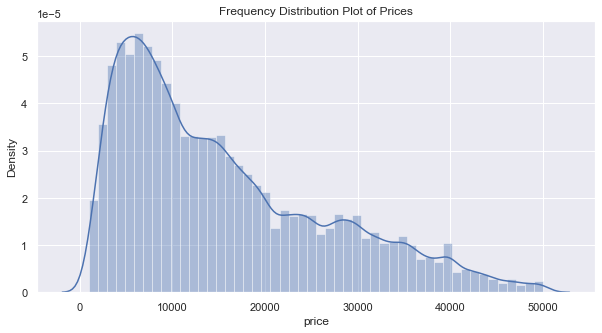

In [64]:
x = df_1.price
plt.figure(figsize=(10,5))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

From the above graph, we can percieve that the data is right skewed i.e. positively skewed wherein mean > median. Mode seem to be somewhere at about 7000. Let us validate this by finding out mean, median and mode. We can also plot a box plot to identify outliers and the distribution of the data

In [65]:
df_1['price'].mean()

15549.944964634873

In [66]:
df_1['price'].median() # clearly mean is greater than median, hence outliers are present towards higher range

12500.0

In [67]:
df_1['price'].mode()

0    6995
dtype: int64

<AxesSubplot:ylabel='price'>

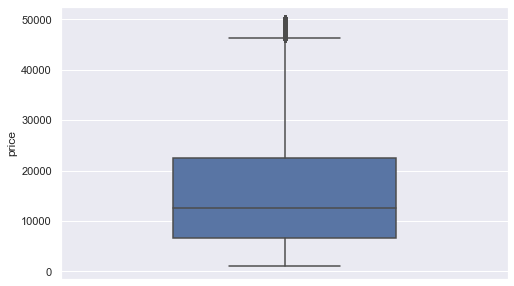

In [68]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price', data=df_1, width=0.5)

From the above box plot, it is pretty clear that there are some outliers beyond 50,000 which may be removed. The median i.e. the middle line in the box is at 13000 approximately, first quartile i.e. 25the percentile is at 6795 and third quartile i.e 75th percentile @ 25,000. Validating these comments as below:

In [69]:
df_1.describe().apply(lambda s: s.apply(lambda x: format(x,'.2f')))

,id,price,year,cylinders,odometer,lat,long
count,213063.00,213063.00,213063.00,213063.00,213063.00,213063.00,213063.00
mean,7235305692.36,15549.94,2011.64,5.79,99593.06,38.75,-93.74
std,4576954.43,11110.90,5.41,1.63,59946.90,5.94,18.03
min,7218796645.00,1000.00,1991.00,0.00,0.00,-58.09,-159.71
25%,7232048976.00,6600.00,2008.00,4.00,49863.00,35.05,-105.95
50%,7236538782.00,12500.00,2013.00,6.00,97000.00,39.54,-87.84
75%,7239379088.50,22490.00,2016.00,8.00,140965.00,42.51,-80.67
max,7241019367.00,49999.00,2021.00,12.00,299916.00,64.99,94.16


Year and Age

In [70]:
df_1['age'] = 2020 - df_1['year']
df_1.head(2)

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date,age
1,7240309422,auburn,7500,2014.0,hyundai,sonata,4.0,gas,93600.0,clean,automatic,fwd,sedan,silver,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600,6.0
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,8.0,diesel,116000.0,lien,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.5475,-85.4682,2020-12-01T12:53:56-0600,15.0


D:\DS\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequncy Distribution Plot for Age of UsedCar')

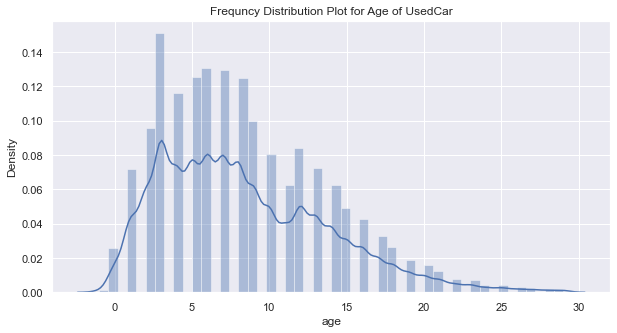

In [71]:
x = df_1['age']
plt.figure(figsize=(10,5))
sns.distplot(x).set_title('Frequncy Distribution Plot for Age of UsedCar')

Manufacturer

In [72]:
mfr = df_1.groupby('manufacturer')['price'].count().sort_values(ascending=False)

In [73]:
mfr_share = pd.DataFrame({'Manufacturer_Count': mfr, "share %":((mfr / len(df_1))*100)})

In [74]:
mfr_share[:20] # clearly first 5 manufacturers contribute to 50% of resale of Used Cars

,Manufacturer_Count,share %
manufacturer,,
ford,39933,18.742344
chevrolet,34808,16.336952
toyota,21321,10.006899
honda,14725,6.911101
nissan,11943,5.605384
jeep,11302,5.304534
ram,8845,4.151354
dodge,8279,3.885705
gmc,7742,3.633667


Model

In [75]:
model = df_1.groupby('model')['price'].count().sort_values(ascending=False)

In [76]:
model_mean = df_1.groupby('model')['price'].mean()
model_mean

model
(300)                         10000.000
*cts only 90k mile            12800.000
- f350 lariat crew cab 4x4    25000.000
- g 37                         7750.000
-350 refrigerated box         14995.000
                                ...    
zdx technology awd             3500.000
zephyr                         3993.125
zx2                            4244.500
zx71                           3700.000
‘04 f250 super duty 6.0        9000.000
Name: price, Length: 12300, dtype: float64

In [77]:
model_share = pd.DataFrame({'Model_Count': model, "share %":((model / len(df_1))*100)})

In [78]:
model_share1 = model_share.copy()

In [79]:
model_share1 = pd.merge(model_share,model_mean,on='model',how='left')

In [80]:
model_share1.rename(columns = {'price':'Mean Price'}, inplace = True)

In [81]:
model_share1[:10]

,Model_Count,share %,Mean Price
model,,,
f-150,5949,2.792132,22544.335014
silverado 1500,4131,1.938863,21818.837570
1500,3096,1.453091,22453.308463
camry,3013,1.414136,9601.933289
escape,2737,1.284597,11396.153087
accord,2664,1.250334,9270.131757
civic,2630,1.234377,8868.837643
altima,2528,1.186504,9249.330301
equinox,2229,1.046169,11828.883804


D:\DS\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequncy Distribution Plot for Odometer')

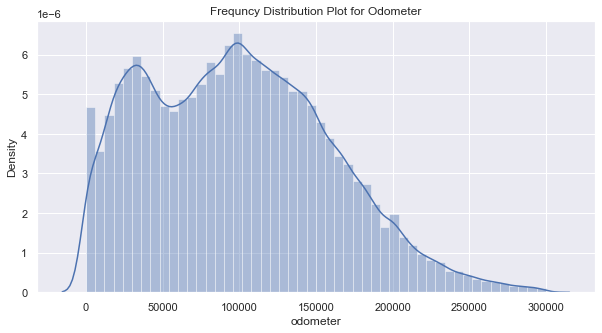

In [82]:
x = df_1['odometer']
plt.figure(figsize=(10,5))
sns.distplot(x).set_title('Frequncy Distribution Plot for Odometer')

The above plot shows there are more Used cars travelled between 20,000 to 40,000kms and again from 90,000 to about 100,000kms. 

In [83]:
df_1['odometer'].median()

97000.0

In [84]:
df_1['odometer'].mode()

0    150000.0
dtype: float64

In [85]:
df_1['odometer'].mean()

99593.0587009476

In [86]:
df_1['paint_color'].unique() # to be rewored and validated

array(['silver', 'blue', 'red', 'black', 'white', 'grey', 'orange',
       'green', 'custom', 'yellow', 'brown', 'purple'], dtype=object)

Text(0.5, 1.0, 'Correlation between features')

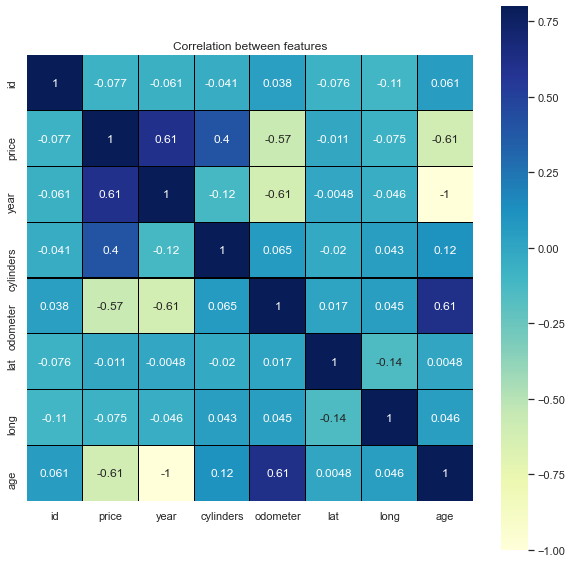

In [87]:
corr = df_1.corr() # remove paint_color as it is wrongly copied from cylinders
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

The above corelation matrix very clearly depicts the positive relationship between Price and year i.e newer the car the higher price. We can also observe a positive relation between price and the no.of cylinders, though we dont know the exact reason behind it, but we can see some positive relationship exist between the two paratmeters. Similarly it also shows the negative coorelation between price and age, odometer i.e the older the car and the longer the distance travelled, the lower the price of the car.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='odometer', ylabel='price'>

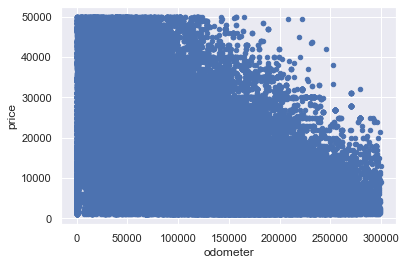

In [88]:
df_1.plot(kind='scatter', x='odometer', y='price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='price'>

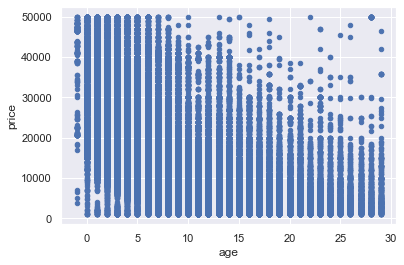

In [89]:
df_1.plot(kind='scatter', x='age', y='price')

The above two plots clearly shows a negative correlation between price and the two variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='cylinders', ylabel='price'>

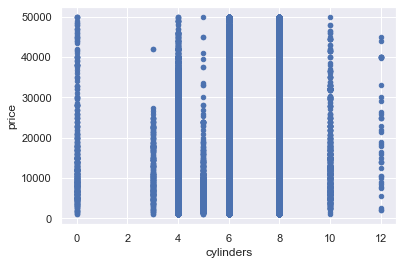

In [90]:
df_1.plot(kind='scatter', x='cylinders', y='price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='year', ylabel='price'>

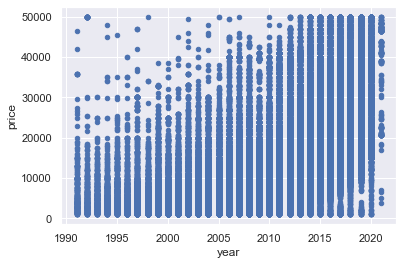

In [91]:
df_1.plot(kind='scatter', x='year', y='price')

The above plot shows a positive relationship between price and year i.e newer the car, higher the price

In [92]:
df_1['fuel'].unique()

array(['gas', 'diesel', 'hybrid', 'other', 'electric'], dtype=object)

In [93]:
fuel_mean = df_1.groupby('fuel')['price'].mean()
fuel_mean

fuel
diesel      26642.673528
electric    17923.148472
gas         14779.746999
hybrid      10675.939294
other       23388.626409
Name: price, dtype: float64

In [94]:
df_1['paint_color'].value_counts()

white     57222
black     42189
silver    35220
red       20956
grey      20049
blue      19927
custom     6698
green      4615
brown      3839
orange      977
yellow      891
purple      480
Name: paint_color, dtype: int64

In [95]:
color = df_1.groupby('paint_color')['price'].count().sort_values(ascending=False)

In [96]:
color_share = pd.DataFrame({'Color_Count': color, "share %":((color / len(df_1))*100)})
color_share

,Color_Count,share %
paint_color,,
white,57222,26.856845
black,42189,19.801186
silver,35220,16.530322
red,20956,9.835589
grey,20049,9.409893
blue,19927,9.352633
custom,6698,3.143671
green,4615,2.166026
brown,3839,1.801814


In [97]:
color_mean = df_1.groupby(['model','paint_color'],as_index=True).agg({'price':np.mean})
color_mean

price
model                      paint_color         
(300)                      white        10000.0
*cts only 90k mile         white        12800.0
- f350 lariat crew cab 4x4 red          25000.0
- g 37                     silver        7750.0
-350 refrigerated box      white        14995.0
...                                         ...
zephyr                     silver        1200.0
zx2                        grey          4494.0
                           red           3995.0
zx71                       white         3700.0
‘04 f250 super duty 6.0    red           9000.0

[26404 rows x 1 columns]

In [98]:
color_mean.xs('f-150')

,price
paint_color,
black,23994.185819
blue,20612.723312
brown,17910.732558
custom,22508.377358
green,16203.963964
grey,21926.346705
orange,27269.545455
red,20833.762575
silver,21033.813679


In [99]:
color_mean.loc[['f-150','silverado 1500']]

price
model          paint_color              
f-150          black        23994.185819
               blue         20612.723312
               brown        17910.732558
               custom       22508.377358
               green        16203.963964
               grey         21926.346705
               orange       27269.545455
               red          20833.762575
               silver       21033.813679
               white        23376.485213
               yellow       13499.272727
silverado 1500 black        24765.584440
               blue         19640.170507
               brown        20508.730000
               custom       22635.138298
               green        14354.279412
               grey         19261.265060
               orange       13098.000000
               purple       13165.166667
               red          23239.327703
               silver       23566.908705
               white        21540.084132
               yellow       10661.666667

The above mean prices w.r.to color for two top models clearly shows that prices depends on the color as well. Prices are more for Orange, White and Black for 'f-150' model and lesser for other models. Similarly, Prices are higher for Black, Red, Silver and Custom made colors for 'silverado 1500' model.

##### Conclusion:

From the above analysis, we can conclude that Price depends on various factors like Manufacturer, Model, Color, Distance travelled and age of the car. 

While the price is directly proportionate to Age and No.of Cylinders, it is inversely proportionate to the distance travelled (odometer)